# MNIST_Autoencoder

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="google.protobuf")




In [3]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(len(x_train), 784)
x_test = x_test.reshape(len(x_test), 784)

In [4]:
encoder = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(32, activation="relu")   
])

In [5]:
decoder = models.Sequential([
    layers.Input(shape=(32,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(784, activation="sigmoid")
])

In [6]:
autoencoder = models.Sequential([encoder, decoder])
autoencoder.compile(optimizer="adam", loss="mse")



In [7]:
autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - loss: 0.0601 - val_loss: 0.0338
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0264 - val_loss: 0.0210
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0193 - val_loss: 0.0172
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0167 - val_loss: 0.0154
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0152 - val_loss: 0.0141


In [8]:
encoded_imgs = encoder.predict(x_test[:5])
decoded_imgs = autoencoder.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step


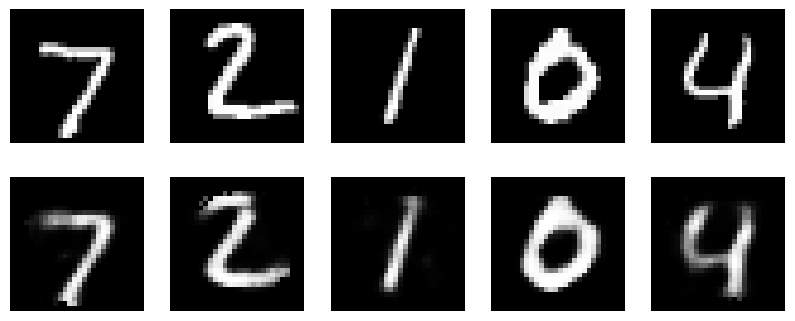

In [9]:
n = 5
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.axis("off")
    
    # Reconstructed
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap="gray")
    plt.axis("off")

plt.show()

## Conclusion

In this notebook, we built an autoencoder using neural networks. The encoder compressed the 784-pixel image into a smaller representation (latent space), and the decoder reconstructed the image back from this compressed form.The idea behind doing this is to learn meaningful features of the data without labels. By forcing the model to compress and then rebuild the image, it learns patterns such as strokes and shapes of digits.From the results, we can see that the reconstructed digits look very close to the original inputs, which shows that the autoencoder was able to capture the important information in the images while ignoring extra noise.In simple words, we trained a model that can take handwritten digits, shrink them into a compact form, and still recover the original image. This concept is useful in tasks like image denoising, dimensionality reduction, anomaly detection, and feature learning.